# Analiza meteoritov in kraterjev

## Uvod
V tem dokumentu bomo izvedli analizo podatkov o meteoritih in kraterjih z uporabo podatkov baze Mednarodnega društva za meteorite in planetarno znanost (https://www.lpi.usra.edu/meteor/metbull.php).
Iskali bomo zanimive in uporabne povezave med podatki, ki so navedeni na prej omenjeni povezavi.

## Priprava okolja
Najprej želimo pripraviti okolje, v katerem lahko podatke obdelujemo tako kot hočemo.
To naredimo tako, da uvozimo željene knjižnice, ki nam bodo olajšale delo in pripravimo podatke za obdelavo.

#### Knjižnice
Nenujne knjižnice (samo za lepši izgled):

In [1]:
# Prettier tables
from IPython.display import HTML

Knjjižnice za obdelavo podatkov:

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib

#### Uvoz podatkov
Uvozimo podatke dobljene iz programa v pandas tabelo:

In [3]:
df = pd.read_json("../data/output.json", precise_float=True)
df.index.names = ["id"]

Tabelo vseh podatkov uredimo po imenih po abecedi, kjer zanemarimo prednost velikih črk pred malimi.

In [4]:
df = df.sort_values(by="Name", key=lambda col: col.str.lower())

Tabela vseh podatkov:

In [5]:
df

,Name,Status,Year,Place,Type,Mass,MetBull,"(Lat,Long)",Fall,Abbrev,Notes,Antarctic
id,,,,,,,,,,,,
1,Aachen,Official,1880.0,"Nordrhein-Westfalen, Germany",L5,21.0,78.0,"[50.775, 6.08333]",Y,NaN,NaN,NaN
2,Aammiq,Official,2000.0,"Al Biqa', Lebanon",H6,596.0,110.0,"[33.7, 35.83333]",NaN,NaN,NaN,NaN
3,Aarhus,Official,1951.0,"Region Midtjylland, Denmark",H6,720.0,8.0,"[56.18333, 10.23333]",Y,NaN,NaN,NaN
4,Aba,Pseudo,1927.0,"Kanto, Japan",Pseudometeorite,NaN,NaN,"[35.95, 140.4]",NaN,NaN,NaN,NaN
5,Aba Panu,Official,2018.0,"Oyo, Nigeria",L3,160000.0,107.0,"[8.28218, 3.56714]",Yc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82858,Zomba,Official,1899.0,"Southern, Malawi",L6,7500.0,NaN,"[-15.18333, 35.28333]",Y,NaN,NaN,NaN
82859,Zsadany,Official,1875.0,"Timis, Romania",H5,552.0,NaN,"[45.916666, 21.216667]",Y,NaN,NaN,NaN
82860,Zubkovsky,Official,2003.0,"Rostovskaya oblast', Russia",L6,2170.0,89.0,"[49.78917, 41.5046]",NaN,NaN,NaN,NaN


#### Meteoriti
Ločimo uradne meteorite od ostalih, saj nas zanimajo neketere lastnosti, ki jih imajo le meteoriti.
Stolpec leto spremenimo v tip pd.Int64Dtype(), saj tabela ne vsebuje več kraterjev, ki imajo v stolpcu let podatke z decimalkami.

In [6]:
met_df = df[df["Status"] == "Official"]
met_df = met_df.astype({ "Year": pd.Int64Dtype() })

Tabela vseh uradno priznanih meteoritov:

In [7]:
met_df

,Name,Status,Year,Place,Type,Mass,MetBull,"(Lat,Long)",Fall,Abbrev,Notes,Antarctic
id,,,,,,,,,,,,
1,Aachen,Official,1880,"Nordrhein-Westfalen, Germany",L5,21.0,78.0,"[50.775, 6.08333]",Y,NaN,NaN,NaN
2,Aammiq,Official,2000,"Al Biqa', Lebanon",H6,596.0,110.0,"[33.7, 35.83333]",NaN,NaN,NaN,NaN
3,Aarhus,Official,1951,"Region Midtjylland, Denmark",H6,720.0,8.0,"[56.18333, 10.23333]",Y,NaN,NaN,NaN
5,Aba Panu,Official,2018,"Oyo, Nigeria",L3,160000.0,107.0,"[8.28218, 3.56714]",Yc,NaN,NaN,NaN
6,Abadla,Official,2015,"Bechar, Algeria",Eucrite-cm,222.0,105.0,"[30.93696, -2.71567]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82858,Zomba,Official,1899,"Southern, Malawi",L6,7500.0,NaN,"[-15.18333, 35.28333]",Y,NaN,NaN,NaN
82859,Zsadany,Official,1875,"Timis, Romania",H5,552.0,NaN,"[45.916666, 21.216667]",Y,NaN,NaN,NaN
82860,Zubkovsky,Official,2003,"Rostovskaya oblast', Russia",L6,2170.0,89.0,"[49.78917, 41.5046]",NaN,NaN,NaN,NaN


#### Kraterji
Ločimo uradne kraterje od ostalih, saj nas zanimajo nekatere lastnosti, ki jih imajo le kraterji.
Prav tako preimenujemo stolpec let v starost, saj so podatki sestavljeni tako, da se starost kraterja vpiše pod leto.

In [8]:
crt_df = df[df["Status"] == "Crater"]
crt_df = crt_df.rename(columns={ "Year": "Age" })

Tabela vseh uradno priznanih kraterjev:

In [9]:
crt_df

,Name,Status,Age,Place,Type,Mass,MetBull,"(Lat,Long)",Fall,Abbrev,Notes,Antarctic
id,,,,,,,,,,,,
476,Acraman,Crater,5.900000e+08,"South Australia, Australia",Impact Crater,NaN,NaN,"[-32.01667, 135.45]",NaN,NaN,From EIDB,NaN
523,Agoudal [crater],Crater,1.050000e+05,"Centre-South, Morocco",Impact Crater,NaN,NaN,"[31.98333, -5.5]",NaN,NaN,From EIDB,NaN
2649,Amelia Creek,Crater,1.640000e+09,"Northern Territory, Australia",Impact Crater,NaN,NaN,"[-20.916667, 134.833333]",NaN,NaN,From EIDB,NaN
2650,Ames,Crater,4.700000e+08,"Oklahoma, USA",Impact Crater,NaN,NaN,"[36.25, -98.2]",NaN,NaN,From EIDB,NaN
2652,Amguid,Crater,1.000000e+05,"Tamanghasset, Algeria",Impact Crater,NaN,NaN,"[26.087481, 4.395056]",NaN,NaN,From EIDB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
68969,Xiuyan,Crater,5.000000e+04,"Liaoning, China",Impact Crater,NaN,NaN,"[40.35, 123.45]",NaN,NaN,From EIDB,NaN
82715,Yarrabubba,Crater,2.000000e+09,"Western Australia, Australia",Impact Crater,NaN,NaN,"[-27.16667, 118.83333]",NaN,NaN,From EIDB,NaN
82824,Zapadnaya,Crater,1.650000e+08,"Zhitomir, Ukraine",Impact Crater,NaN,NaN,"[49.73333, 29.0]",NaN,NaN,From EIDB,NaN


## Deset najboljših

Pogledali si bomo deset najboljših vnosov po naslednjih kriterijih:
* najtežji
* najstarejši
* najpogostejši tip
* najpogostejše leto

#### Deset najtežjih meteoritov
Iz tabele meteoritov izberemo stolpce, ki jih želimo prikazati in dobljene vrstice razvrstimo po masi.
Potem lahko preberemo deset vrhnjih vrstic, kar bo predstavljalo naših deset najtežjih meteoritov.
Na koncu podatke še preoblikujemo v bolj berljivo obliko.

In [10]:
top10_mass = met_df[["Name", "Year", "Place", "Mass"]].sort_values("Mass", ascending=False).head(10)
top10_mass["Mass"] = (top10_mass["Mass"]/10**6).apply(lambda m: f"{m} ton")

Povprečna masa meteorita v gramih:

In [11]:
round(float(met_df["Mass"][met_df["Mass"].notna()].mean()), 3)

9503.334

Povprečen meteorit torej tehta približno 10 kg.

Tabela desetih najtežjih meteoritov, s krajem in letom padca ter maso:

In [12]:
HTML(top10_mass.to_html(index=False))

Name,Year,Place,Mass
Aletai,1898,"Xinjiang, China",74.0 ton
Hoba,1920,"Grootfontein, Namibia",60.0 ton
Cape York,1818,"Nordgronland, Greenland",58.2 ton
Campo del Cielo,1576,"Chaco, Argentina",50.0 ton
Canyon Diablo,1891,"Arizona, USA",30.0 ton
Gibeon,1836,"Namaland, Namibia",26.0 ton
Chupaderos,1852,"Chihuahua, Mexico",24.3 ton
Mundrabilla,1911,"Western Australia, Australia",24.0 ton
Sikhote-Alin,1947,"Primorskiy kray, Russia",23.0 ton
Bacubirito,1863,"Sinaloa, Mexico",22.0 ton


Vidimo, da je zgornja polovica tabela tudi več kot dvakrat težja od spodnje, kar pomeni, da so meteoriti takih velikosti zelo redek pojav.
Le štirje presegajo mejo 50 ton.
Osupljiv je tudi najtežji meteorit, ki tehta približno toliko kot 12 afriških slonov ali 37 dvotonskih avtomobilov.

Vsi našteti meteoriti so torej 2000-krat do 7000-krat težji od povprečnega meteorita.

#### Deset najstarejših meteoritov in kraterjev
Iz tabele meteoritov ali kraterjev izberemo stolpce, ki jih želimo prikazati in dobljene vrstice razvrstimo po letu oziroma starosti.
Potem lahko preberemo deset vrhnjih vrstic, kar bo predstavljalo naših deset najstarejših meteoritov ali kraterjev.
Na koncu podatke še preoblikujemo v bolj berljivo obliko.

In [13]:
top10_met_age = met_df[["Name", "Place", "Year"]].sort_values("Year", ascending=True).head(10)
top10_met_age["Year"] = top10_met_age["Year"].apply(lambda y: f"{abs(y)} pr. n. št." if y < 0 else str(y))

In [14]:
top10_crt_age = crt_df[["Name", "Place", "Age"]].sort_values("Age", ascending=False).head(10)
top10_crt_age["Age"] = (top10_crt_age["Age"]/10**9).apply(lambda a: f"{round(a, 1)} milijard let")

Tabela desetih najstarejših meteoritov, s krajem in letom padca:

In [15]:
HTML(top10_met_age.to_html(index=False))

Name,Place,Year
Ur,"Dhi Qar, Iraq",2500 pr. n. št.
Wietrzno-Bobrka,"Krosno, Poland",600 pr. n. št.
Havana,"Illinois, USA",300 pr. n. št.
Nogata,"Kyushu, Japan",861
Narni,"Umbria, Italy",921
Elbogen,"Karlovarsk, Czech Republic",1400
Rivolta de Bassi,"Lombardia, Italy",1491
Ensisheim,"Alsace, France",1492
Valdinoce,"Emilia-Romagna, Italy",1496
Oliva-Gandia,"Valenciana, Spain",1520


Kot bi lahko predvidevali, nam tabela razkrije, da meteoritov iz tisoč ali več let nazaj ni veliko, saj takrat teh dogodkov niso bili sposobni beležiti tako kot danes.
Vselej pa najdemo kar tri meteorite iz časa pred našim štetjem in kar pet pred letom 1000.

Tabela desetih najstarejših kraterjev, s krajem in starostjo:

In [16]:
HTML(top10_crt_age.to_html(index=False))

Name,Place,Age
Avak,"Alaska, USA",34.8 milijard let
Suavjrvi,"Respublika Kareliya, Russia",2.4 milijard let
Vredefort,"Free State, South Africa",2.0 milijard let
Yarrabubba,"Western Australia, Australia",2.0 milijard let
Sudbury,"Ontario, Canada",1.9 milijard let
Paasselk,"Mikkeli, Finland",1.8 milijard let
Keurusselk,"Hame, Finland",1.8 milijard let
Dhala,"Madhya Pradesh, India",1.7 milijard let
Amelia Creek,"Northern Territory, Australia",1.6 milijard let
Shoemaker,"Western Australia, Australia",1.6 milijard let


V tabeli očitno odstopa "najstarejši" krater med vsemi, saj je starejši od vesolja samega.
Potrdimo lahko, da je to napaka v podatkovni bazi in ne v naših programih, saj je starost navedena kot 34759 Ma (Ma = mega-annum) ali 34759 milijonov let.

Sicer pa lahko vidimo, da imamo kraterje, ki dosegajo starosti do polovice starosti Zemlje.

#### Deset najpogostejših tipov
V tabeli meteoritov dobimo tabelo pojavitev vseh tipov meteorita, ki je že razvrščena po velikosti.
Iz tega izberemo vrhnjih deset vrstic, kar bo predstavljalo naših deset najpogostejših tipov meteorita.
Tabelo še preoblikujemo tako, da bo prikaz lepši.

In [17]:
top10_types = met_df["Type"].value_counts().head(10)
top10_types = top10_types.to_frame(name="Occurances").reset_index()

Legenda tipov meteoritov, ki so našteti v tabeli (več na: https://en.wikipedia.org/wiki/Chondrite):
* LL\<št.\> - skupina "low-iron, low-metal"
* L\<št.\> - skupina "low-iron"
* H\<št.\> - skupina "high-iron"
* \<št.\> - stopnja homogenosti meteorita

Tabela desetih najpogostejših tipov meteoritov:

In [18]:
HTML(top10_types.to_html(index=False))

Type,Occurances
L6,12995
H5,11988
L5,8963
H6,6996
H4,6548
LL5,3312
LL6,2949
L4,2102
L3,859
H3,716


#### Deset najpogostejših let padca
V tabeli meteoritov dobimo tabelo pojavitev vseh let, ki je že razvrščena po velikosti.
Iz tega izberemo vrhnjih deset vrstic, kar bo predstavljalo naših deset najpogostejših let padca.
Tabelo še preoblikujemo tako, da bo prikaz lepši.

In [19]:
top10_years = met_df["Year"].value_counts().head(10)
top10_years = top10_years.to_frame(name="Amount").reset_index()

Tabela desetih let z največ meteoriti:

In [20]:
HTML(top10_years.to_html(index=False))

Year,Amount
2000,4669
2003,4138
1998,4075
2010,4036
1979,3335
2006,3170
2009,2442
1988,2402
2002,2151
2014,2136


Vidimo, da število meteoritov narašča skoraj naključno z naključnimi leti.
Predvidevali bi lahko, da bodo imela poznejša leta več meteoritov zaradi boljših merskih sposobnosti, vendar so leta na seznamu povsem naključna in nobeno od njih ni v zadnjem desetletju.

## Grafični prikazi
Pogledali bomo povezave med različnimi spremenljivkami z uporabo grafov.

#### Meteoriti skozi čas
Poskusimo narisati grafe števila meteoritov skozi zgodovino.

Graf števila padlih meteoritov v desetletju od leta 1700 dalje:

<Axes: xlabel='Year', ylabel='Amount'>

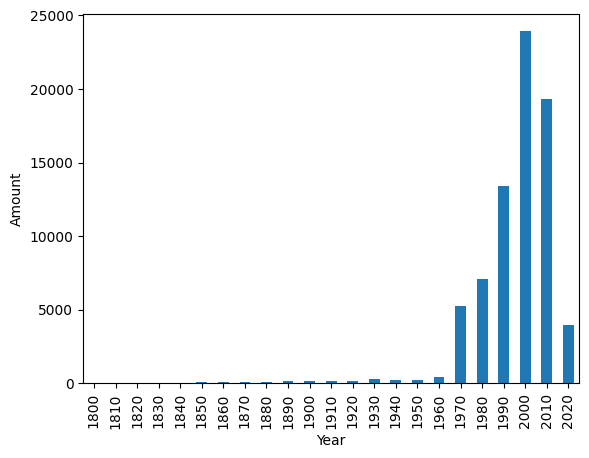

In [59]:
((met_df[met_df["Year"] > 1800]["Year"]//10)*10).value_counts().sort_index().plot.bar(ylabel="Amount")

Očitno je, da so skoraj vsi meteoriti v podatkovni bazi iz zadnjih 50 let, zato moramo časovno obdobje skrajšati, da dobimo boljšo predstavo.

Graf števila padlih meteoritov v desetletju od leta 1950 dalje:

<Axes: xlabel='Year', ylabel='Amount'>

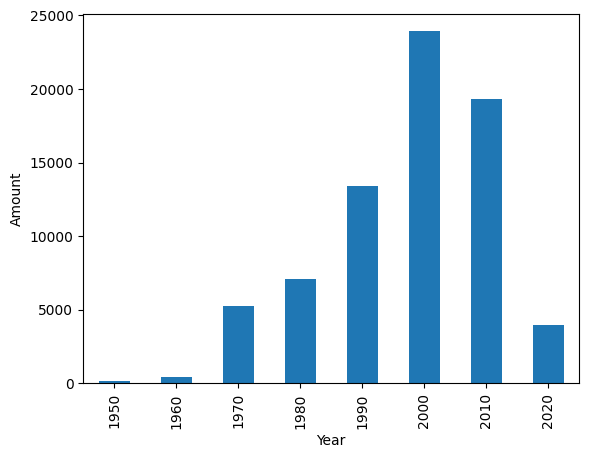

In [57]:
((met_df[met_df["Year"] > 1950]["Year"]//10)*10).value_counts().sort_index().plot.bar(ylabel="Amount")

Graf števila padlih meteoritov v letu od leta 1950 dalje:

<Axes: xlabel='Year', ylabel='Amount'>

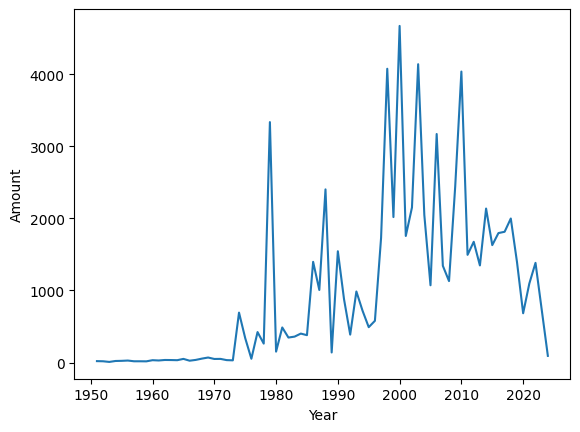

In [58]:
met_df[met_df["Year"] > 1950]["Year"].value_counts().sort_index().plot(ylabel="Amount")

Podatki delujejo zelo naključni, z zelo velikimi skoki in padci iz leta v leto.
To bi lahko bila posledica, da ob prodoru meteorja v atmosfero ta ponavadi razpade na več manjših.
Torej bi lahko ob padcu velikega meteorita, ki se razbije na tisoče delov graf močno poskočil.